# Borrower and loan characteristics effects.

## by Smily Garg

## Investigation Overview

The purpose of this presentation is to share research findings on how various factors may impact the rate of unpaid loans among Prosper listings.

## Dataset Overview

The dataset consists of more than 100,000 consumer loan listings from Prosper, including information about the borrower, loan details, and loan status. For this investigation, only closed loans were analyzed, resulting in a dataset of over 43,000 listings with attributes such as loan amount, borrower income and employment, and debt-to-income ratio.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import importlib

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("final_loans.csv")

In [6]:
df.loc[df.Paid==True,"Paid"]="Paid"
df.loc[df.Paid==False,"Paid"]="Defaulted"
df.sample(5)

,ListingKey,LoanStatus,BorrowerAPR,ProsperRating,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid,LoanToIncome
6075,1BCB3375028366462765DB6,Completed,0.29776,NaN,NaN,0.02,Not displayed,7500.000000,0.0,NaN,NaN,NaN,2550,60.03,NaN,Paid,0.028333
4001,155F349804793447656214D,Completed,0.29265,D,Employed,0.06,"$25,000-49,999",2833.333333,1.0,35.0,10200.0,2.91,3750,150.59,8.0,Paid,0.110294
35321,CB4B3402304184779F561DD,Completed,0.18224,NaN,Employed,0.05,"$25,000-49,999",2916.666667,0.0,NaN,NaN,NaN,3000,107.71,NaN,Paid,0.085714
8047,96B33385290322816F6921B,Defaulted,0.23448,NaN,Employed,0.16,"$50,000-74,999",4720.833333,0.0,NaN,NaN,NaN,5000,190.82,NaN,Defaulted,0.088261
26648,8C1F338307502064038BFCD,Completed,0.16588,NaN,Employed,0.35,"$25,000-49,999",2083.333333,0.0,NaN,NaN,NaN,1550,52.40,NaN,Paid,0.062000


In [8]:
# Make Prosper ratings into categorical ordered data
prosper_ratings_categories = ["HR","E","D","C","B","A","AA"]
prosper_ratings_categories_types=pd.api.types.CategoricalDtype(ordered=True, categories=prosper_ratings_categories)
df.ProsperRating=df.ProsperRating.astype(prosper_ratings_categories_types)
df.sample(10)

,ListingKey,LoanStatus,BorrowerAPR,ProsperRating,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid,LoanToIncome
26669,4FF63525083367576E740F2,Completed,0.20200,B,Employed,0.13,"$100,000+",12166.666667,0.0,NaN,NaN,NaN,5000,180.74,NaN,Paid,0.034247
4551,998F33759607704205C7E7B,Completed,0.24753,NaN,Not available,0.07,Not displayed,8000.000000,0.0,NaN,NaN,NaN,2550,100.04,NaN,Paid,0.026562
27097,EFB53530073224512750CBF,Completed,0.17359,B,Employed,0.14,"$100,000+",15250.000000,1.0,27.0,5000.0,1249.42,11500,395.79,0.0,Paid,0.062842
20853,0B9F348864263931447E5A0,Completed,0.29334,D,Employed,0.14,"$50,000-74,999",5750.000000,1.0,17.0,1000.0,0.00,5200,212.29,0.0,Paid,0.075362
15180,C47D3418861232707D8C3EA,Completed,0.18403,NaN,Employed,0.33,"$50,000-74,999",5000.000000,0.0,NaN,NaN,NaN,11000,391.91,NaN,Paid,0.183333
36706,10E834198807735011549D2,Completed,0.10305,NaN,Employed,0.22,"$50,000-74,999",4224.666667,0.0,NaN,NaN,NaN,2000,63.53,NaN,Paid,0.039451
38333,27DF3531069074524EAB248,Completed,0.29240,D,Employed,0.11,"$100,000+",10000.000000,1.0,9.0,7500.0,6140.02,10000,399.56,0.0,Paid,0.083333
35025,935C342292413325393A0E6,Completed,0.21480,NaN,Employed,0.39,"$50,000-74,999",4166.666667,0.0,NaN,NaN,NaN,2000,0.00,NaN,Paid,0.040000
32647,84543383415288521C6AFCE,Completed,0.16215,NaN,Employed,0.25,"$100,000+",11561.500000,0.0,NaN,NaN,NaN,12000,387.62,NaN,Paid,0.086494
37484,2333342035890189173202D,Defaulted,0.17322,NaN,Employed,0.15,"$100,000+",12000.000000,0.0,NaN,NaN,NaN,6000,208.43,NaN,Defaulted,0.041667


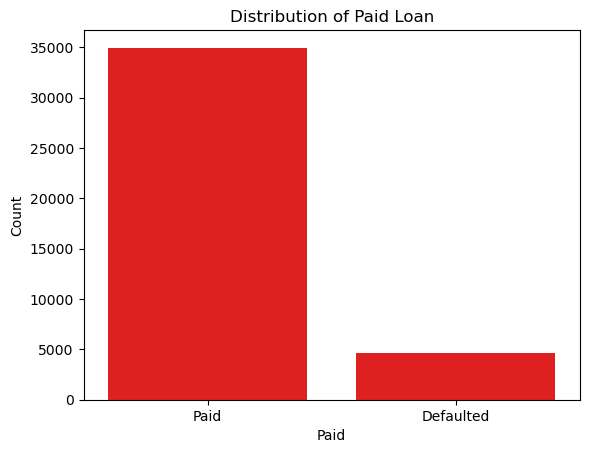

In [9]:
sb.countplot(data=df, x="Paid", color = 'r')
plt.title('Distribution of Paid Loan')
plt.xlabel("Paid")
plt.ylabel("Count");

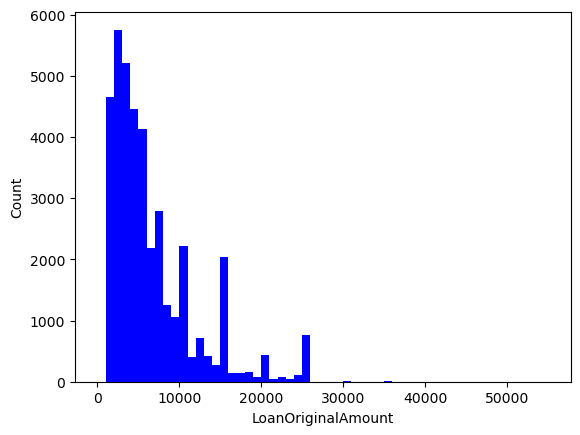

In [10]:
# amount of loan plotted on histogram
bin_group = np.arange(0,55000+1000,1000)
plt.hist(df.LoanOriginalAmount, bins=bin_group,color='b')
plt.xlabel("LoanOriginalAmount")
plt.ylabel("Count");

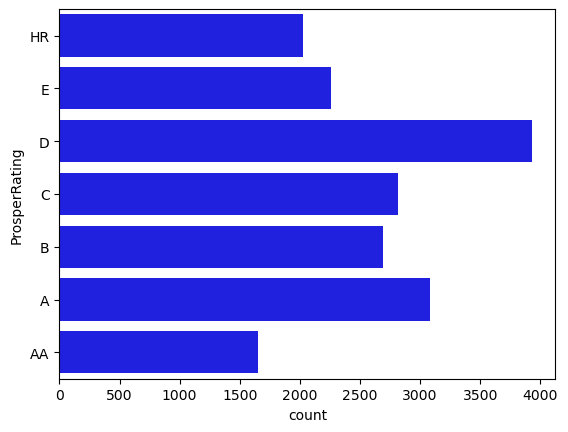

In [12]:
# Plotting ProsperRating_Alpha using countplot
sb.countplot(data=df, y="ProsperRating",color='b');

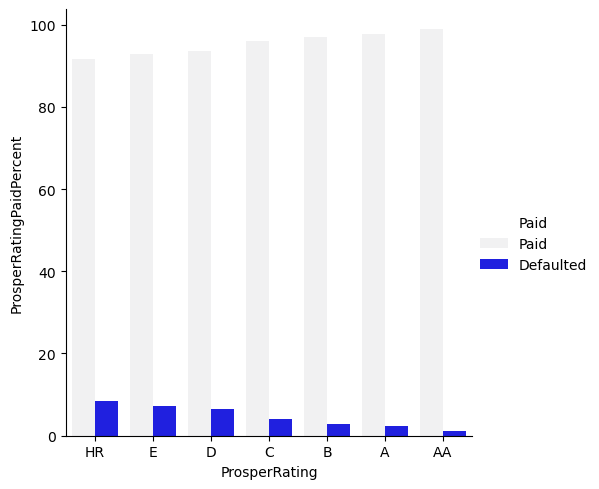

In [15]:
var_temp=df.groupby(["ProsperRating"])["Paid"].value_counts(normalize=True).mul(100)
var_temp=var_temp.reset_index(name="ProsperRatingPaidPercent")
var_temp
sb.catplot(data=var_temp, x="ProsperRating",y="ProsperRatingPaidPercent", hue="Paid", kind="bar",color='b');

In [17]:
df.head(5)

,ListingKey,LoanStatus,BorrowerAPR,ProsperRating,EmploymentStatus,DebtToIncomeRatio,IncomeRange,MonthlyIncome,PriorLoans,PriorOnTime,PriorBorrowed,PriorOutstanding,LoanOriginalAmount,MonthlyLoanPayment,PriorLate,Paid,LoanToIncome
0,1021339766868145413AB3B,Completed,0.16516,NaN,Employed,0.17,"$25,000-49,999",3083.333333,0.0,NaN,NaN,NaN,9425,330.43,NaN,Paid,0.254730
1,0EE9337825851032864889A,Completed,0.28269,NaN,Not available,0.06,Not displayed,2083.333333,0.0,NaN,NaN,NaN,3001,123.32,NaN,Paid,0.120040
2,0F1734025150298088A5F2B,Completed,0.15033,NaN,Employed,0.27,"$1-24,999",1666.666667,0.0,NaN,NaN,NaN,1000,33.81,NaN,Paid,0.050000
3,0F483544120452347F48121,Defaulted,0.35797,HR,Other,0.49,"$50,000-74,999",5500.000000,0.0,NaN,NaN,NaN,4000,173.71,NaN,Defaulted,0.060606
4,1017340630713945364DA6B,Completed,0.21488,NaN,Employed,0.09,"$25,000-49,999",3750.000000,0.0,NaN,NaN,NaN,3000,112.64,NaN,Paid,0.066667


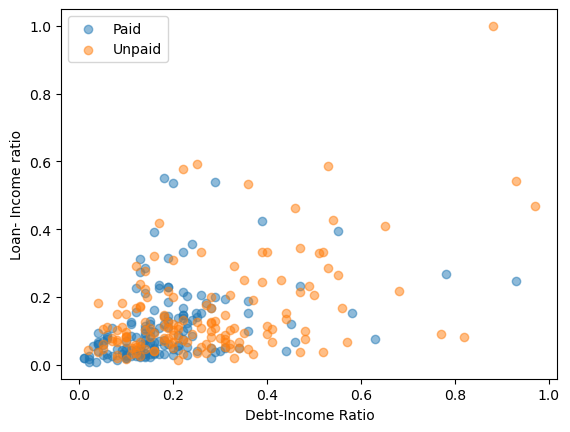

In [20]:
df_paid = df[df['Paid'] == 'Paid'].sample(150)
df_unpaid = df[df['Paid'] == 'Defaulted'].sample(150)
plt.scatter(data = df_paid, x = 'DebtToIncomeRatio', y = 'LoanToIncome',alpha=0.5)
plt.scatter(data = df_unpaid, x = 'DebtToIncomeRatio', y = 'LoanToIncome', alpha=0.5)
plt.legend(['Paid','Unpaid'])
plt.xlabel("Debt-Income Ratio")
plt.ylabel("Loan- Income ratio");